# Assignment No 04
Name: Mihir Unmesh Patil \\
PRN NO: 122B1B213 \\
Batch: C/c-3

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from google.colab.patches import cv2_imshow

Original Image: 


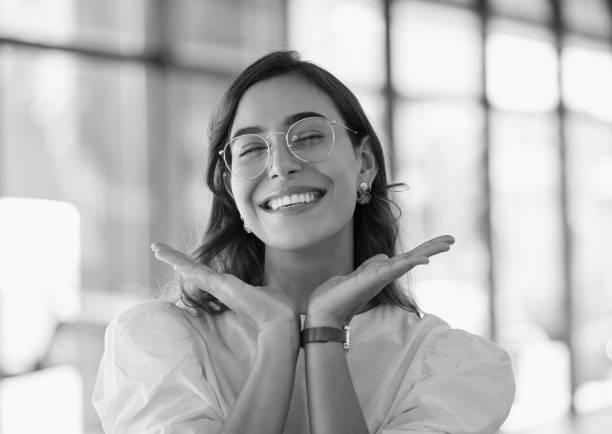

In [7]:
image_path = "girl.jpg"
print("Original Image: ")
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
if img is None:
    raise ValueError("Image could not be loaded. Check the file path.")

In [8]:
#Kernels:
roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)

In [62]:
def roberts_edge_detection(img):
    edge_x = convolve(img, roberts_x)
    edge_y = convolve(img, roberts_y)
    combined = np.hypot(edge_x, edge_y)

    print("For X-axis:")
    cv2_imshow(edge_x)
    print("#################################################################################################################################################")
    print("For Y-axis:")
    cv2_imshow(edge_y)
    print("#################################################################################################################################################")
    print("Combined:")
    cv2_imshow(combined)

    return combined

def prewitt_edge_detection(img):
    edge_x = convolve(img, prewitt_x)
    edge_y = convolve(img, prewitt_y)
    combined = np.hypot(edge_x, edge_y)

    print("For X-axis:")
    cv2_imshow(edge_x)
    print("#################################################################################################################################################")
    print("For Y-axis:")
    cv2_imshow(edge_y)
    print("#################################################################################################################################################")
    print("Combined:")
    cv2_imshow(combined)

    return combined

def sobel_edge_detection(img):
    edge_x = convolve(img, sobel_x)
    edge_y = convolve(img, sobel_y)
    combined = np.hypot(edge_x, edge_y)

    print("For X-axis:")
    cv2_imshow(edge_x)
    print("#################################################################################################################################################")
    print("For Y-axis:")
    cv2_imshow(edge_y)
    print("#################################################################################################################################################")
    print("Combined:")
    cv2_imshow(combined)

    return combined

def laplacian_edge_detection(img, laplacian_kernel):
    img_float = img.astype(np.float64)
    laplace = cv2.filter2D(img_float, -1, laplacian_kernel)
    laplace_abs = np.absolute(laplace)
    laplace_normalized = cv2.normalize(laplace_abs, None, 0, 255, cv2.NORM_MINMAX)
    return laplace_normalized.astype(np.uint8)

In [63]:
def apply_edge_detection(img, choice):
    methods = {
        1: roberts_edge_detection,
        2: prewitt_edge_detection,
        3: sobel_edge_detection,
        4: laplacian_edge_detection
    }
    method = methods.get(choice, None)
    if method is None:
        print("Invalid choice! Use 1 for Roberts, 2 for Prewitt, 3 for Sobel, or 4 for Laplacian.")
        return None
    if method == laplacian_edge_detection:
        return method(img, laplacian_kernel)
    return method(img)

Enter your choice (1 for Roberts, 2 for Prewitt, 3 for Sobel, or 4 for Laplacian): 1
For X-axis:


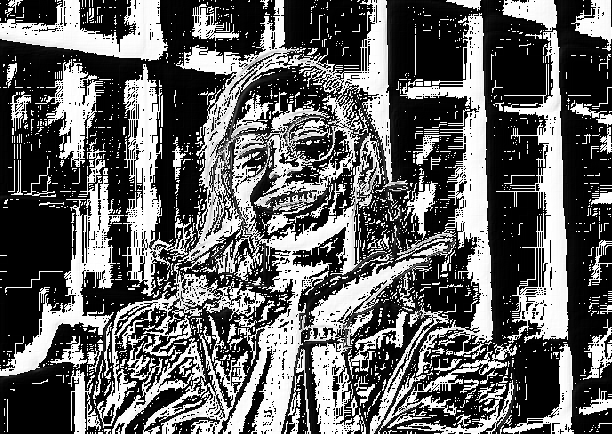

#################################################################################################################################################
For Y-axis:


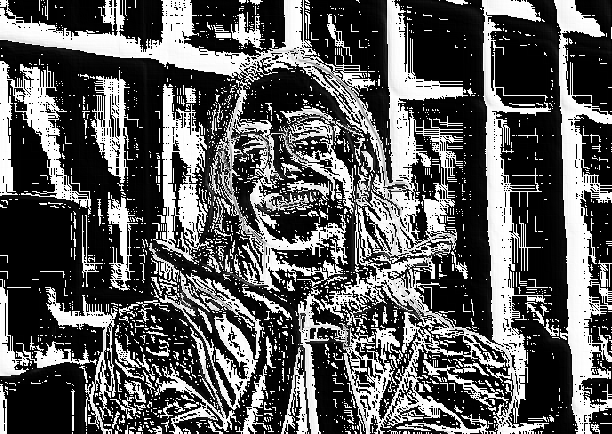

#################################################################################################################################################
Combined:


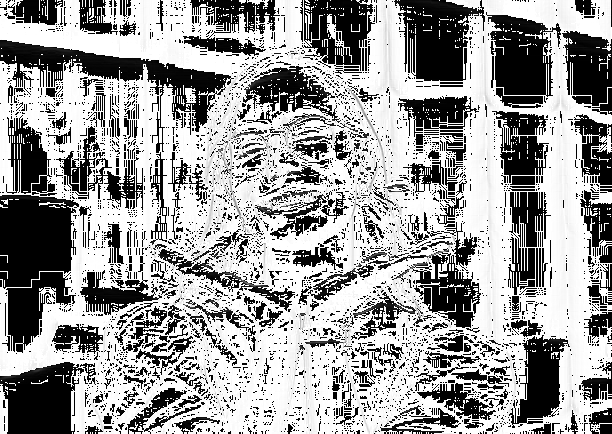

#################################################################################################################################################


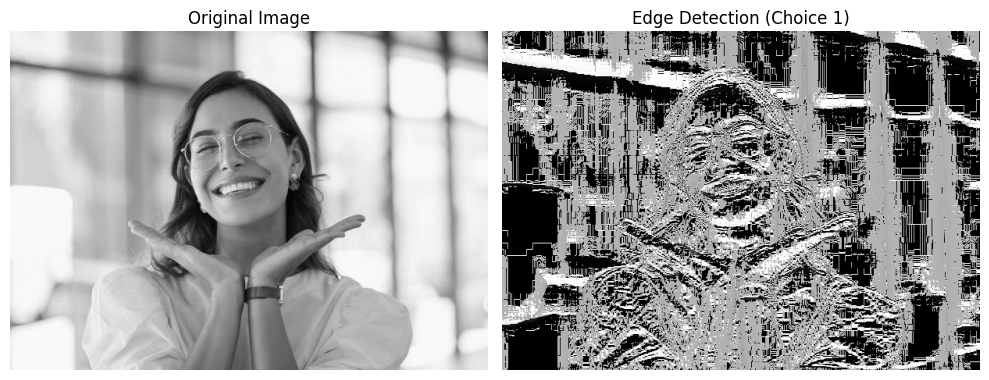

Edge detection completed successfully!


In [65]:
choice = int(input("Enter your choice (1 for Roberts, 2 for Prewitt, 3 for Sobel, or 4 for Laplacian): "))
result = apply_edge_detection(img, choice)
print("#################################################################################################################################################")

if result is not None:
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image'), plt.axis('off')
    plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title(f'Edge Detection (Choice {choice})'), plt.axis('off')
    plt.tight_layout()
    plt.show()
    print("Edge detection completed successfully!")

############################################################################################################################
[[241 241 242 ...  64  56  53]
 [240 241 241 ...  66  58  55]
 [240 240 241 ...  69  60  56]
 ...
 [230 235 241 ... 231 231 231]
 [229 234 240 ... 231 231 231]
 [229 234 240 ... 231 231 231]]
Original Image: 


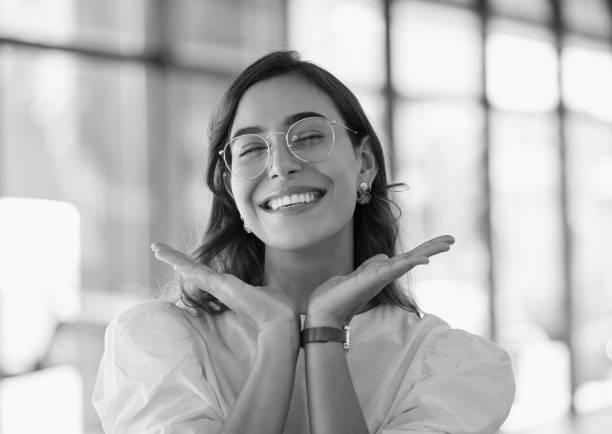

############################################################################################################################
[[185 187 185 ...  51  50  48]
 [188 185 188 ...  51  48  46]
 [186 187 186 ...  51  49  49]
 ...
 [185 182 184 ... 179 179 179]
 [186 182 185 ... 179 179 179]
 [185 182 184 ... 179 179 179]]
Original Image: 


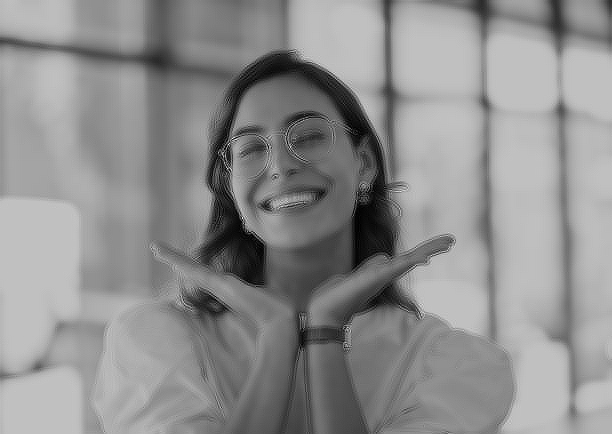

Edge detection completed successfully!


In [17]:
laplacian_kernel2 = np.array([
    [0,  1,  0],
    [1, -3,  1],
    [0,  1,  0]
], dtype=np.float64)
print("############################################################################################################################")
result = laplacian_edge_detection(img, laplacian_kernel2)
print(img)
print("Original Image: ")
cv2_imshow(img)
print("############################################################################################################################")
print(result)
print("Original Image: ")
cv2_imshow(result)
print("Edge detection completed successfully!")

############################################################################################################################
[[241 241 242 ...  64  56  53]
 [240 241 241 ...  66  58  55]
 [240 240 241 ...  69  60  56]
 ...
 [230 235 241 ... 231 231 231]
 [229 234 240 ... 231 231 231]
 [229 234 240 ... 231 231 231]]
Original Image: 


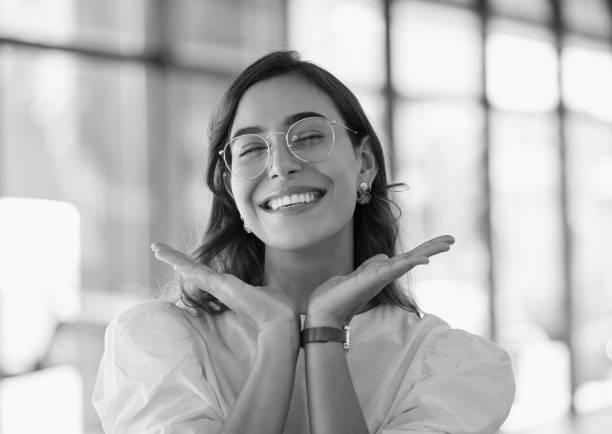

############################################################################################################################
[[110 109 111 ...  28  21  19]
 [108 110 109 ...  30  24  22]
 [109 108 109 ...  32  25  21]
 ...
 [100 107 111 ... 105 105 105]
 [ 99 105 109 ... 105 105 105]
 [ 99 106 110 ... 105 105 105]]
Original Image: 


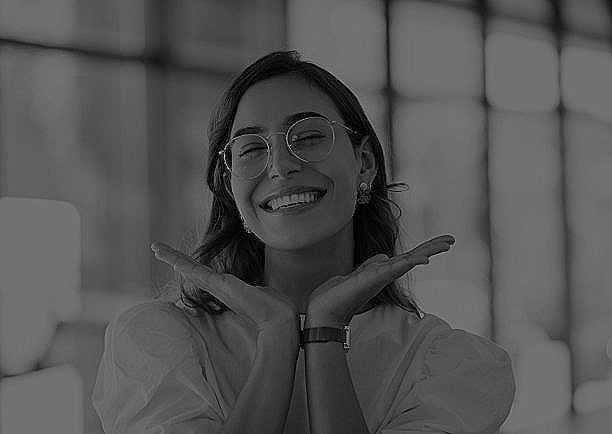

Edge detection completed successfully!


In [18]:
laplacian_kernel3 = np.array([
    [0,  1,  0],
    [1, -5,  1],
    [0,  1,  0]
], dtype=np.float64)
print("############################################################################################################################")
result = laplacian_edge_detection(img, laplacian_kernel3)
print(img)
print("Original Image: ")
cv2_imshow(img)
print("############################################################################################################################")
print(result)
print("Original Image: ")
cv2_imshow(result)
print("Edge detection completed successfully!")

############################################################################################################################
[[241 241 242 ...  64  56  53]
 [240 241 241 ...  66  58  55]
 [240 240 241 ...  69  60  56]
 ...
 [230 235 241 ... 231 231 231]
 [229 234 240 ... 231 231 231]
 [229 234 240 ... 231 231 231]]
Original Image: 


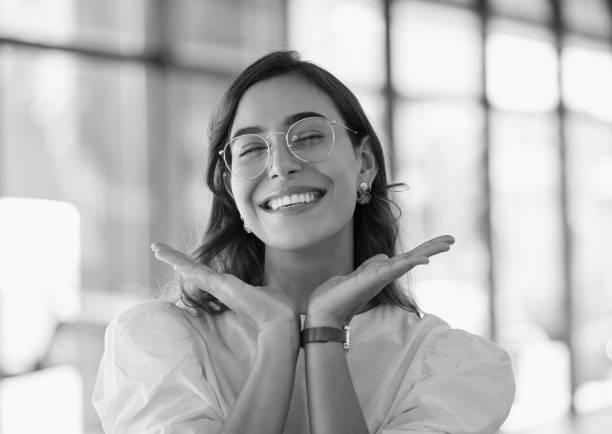

############################################################################################################################
[[ 0  0  0 ...  2  8  9]
 [ 0  0  0 ...  0  4  5]
 [ 0  0  0 ...  2  4  6]
 ...
 [ 8  0  2 ...  0  0  0]
 [10  1  0 ...  0  0  0]
 [ 9  0  1 ...  0  0  0]]
Original Image: 


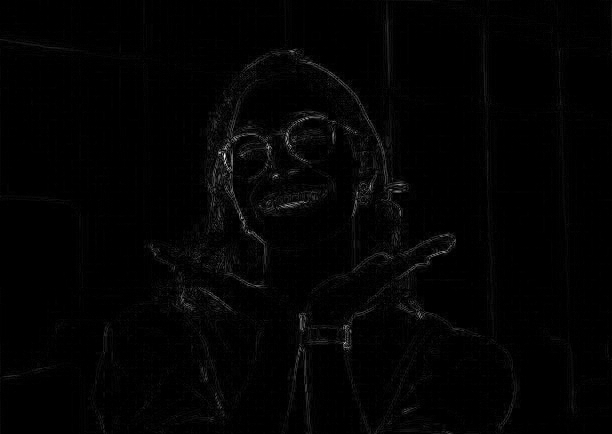

Edge detection completed successfully!


In [20]:
laplacian_kernel4 = np.array([
    [-1, 0, -1],
    [0, 4, 0],
    [-1, 0, -1]
], dtype=np.float64)
print("############################################################################################################################")
result = laplacian_edge_detection(img, laplacian_kernel4)
print(img)
print("Original Image: ")
cv2_imshow(img)
print("############################################################################################################################")
print(result)
print("Original Image: ")
cv2_imshow(result)
print("Edge detection completed successfully!")

############################################################################################################################
[[241 241 242 ...  64  56  53]
 [240 241 241 ...  66  58  55]
 [240 240 241 ...  69  60  56]
 ...
 [230 235 241 ... 231 231 231]
 [229 234 240 ... 231 231 231]
 [229 234 240 ... 231 231 231]]
Original Image: 


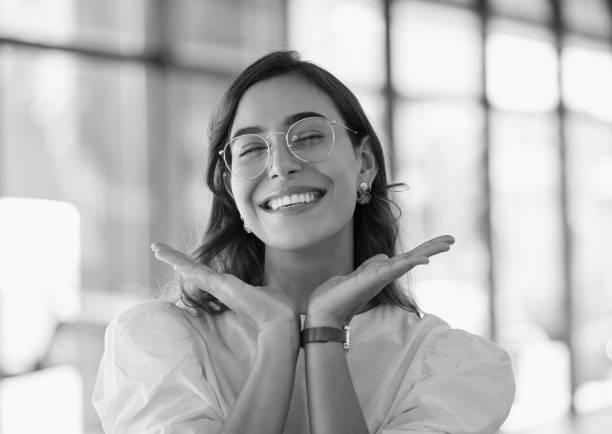

############################################################################################################################
[[ 0  0  1 ...  2  8  9]
 [ 1  0  0 ...  0  4  5]
 [ 0  1  0 ...  2  4  6]
 ...
 [ 8  0  2 ...  0  0  0]
 [10  1  0 ...  0  0  0]
 [ 9  0  1 ...  0  0  0]]
Original Image: 


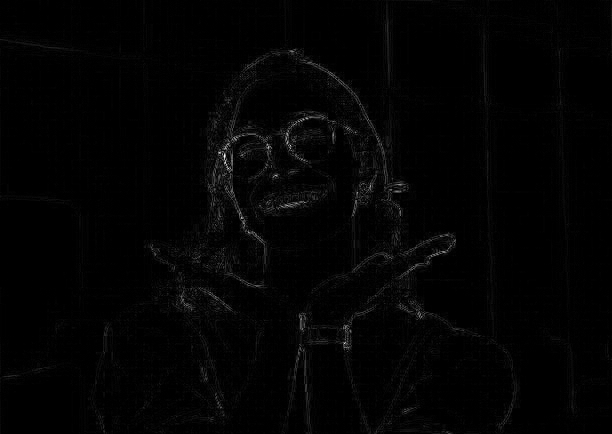

Edge detection completed successfully!


In [21]:
laplacian_kernel5 = np.array([
    [-1,  -1,  -1],
    [-1, 8,  -1],
    [-1,  -1,  -1]
], dtype=np.float64)
print("############################################################################################################################")
result = laplacian_edge_detection(img, laplacian_kernel5)
print(img)
print("Original Image: ")
cv2_imshow(img)
print("############################################################################################################################")
print(result)
print("Original Image: ")
cv2_imshow(result)
print("Edge detection completed successfully!")